In [126]:
import pandas as pd

PATH = 'C:/project/Used Car Price Predictor/Used-Car-Price-Predictor/insurance_history'

df =pd.read_csv(PATH)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_number       2327 non-null   object 
 1   cno              2328 non-null   int64  
 2   total_loss       2313 non-null   object 
 3   robbery          2313 non-null   object 
 4   submerged        2313 non-null   object 
 5   special_use      2313 non-null   object 
 6   my_damage        2313 non-null   object 
 7   opponent_damage  2313 non-null   object 
 8   owner_changes    2313 non-null   object 
 9   number_changes   2313 non-null   object 
 10  rental_use       2313 non-null   object 
 11  business_use     2313 non-null   object 
 12  official_use     2313 non-null   object 
 13  도장               370 non-null    float64
 14  탈착               370 non-null    float64
 15  교환               370 non-null    float64
 16  판금               370 non-null    float64
 17  수리            

In [25]:
df.describe()

,cno,도장,탈착,교환,판금,수리,기타
count,2.328000e+03,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,2.225498e+06,4.032432,5.721622,3.662162,1.845946,0.564865,1.840541
std,1.840543e+04,3.589963,4.933797,3.487014,2.218559,0.947030,2.383089
min,1.755508e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.226116e+06,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,2.230226e+06,3.000000,4.500000,3.000000,1.000000,0.000000,1.000000
75%,2.231938e+06,5.750000,7.000000,5.000000,3.000000,1.000000,2.000000
max,2.232961e+06,26.000000,29.000000,24.000000,16.000000,7.000000,21.000000


c:\Users\user\anaconda3\envs\usedCar\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\usedCar\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\usedCar\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\usedCar\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\usedCar\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.c

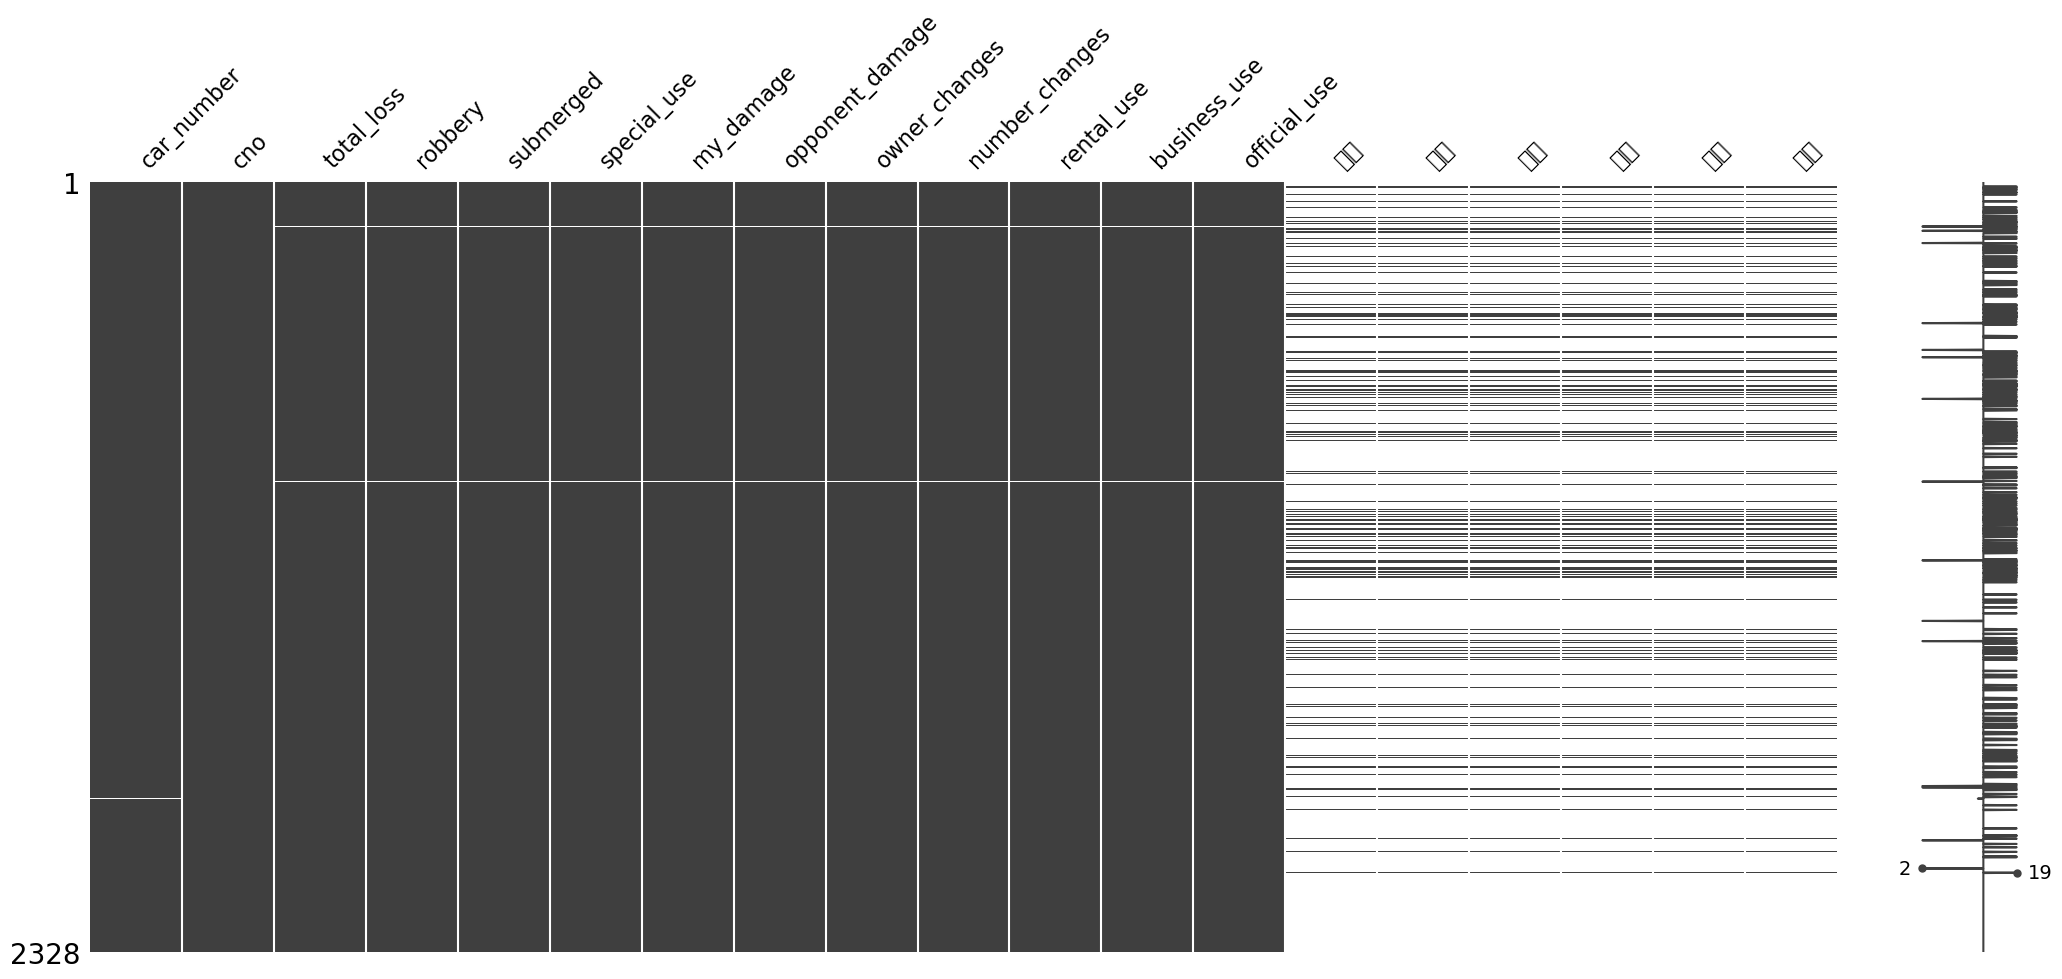

In [44]:
import missingno as msno
import matplotlib.pyplot as plt

# print(msno.__file__)
msno.matrix(df)
plt.show()

In [45]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

기타                 1958
수리                 1958
판금                 1958
교환                 1958
탈착                 1958
도장                 1958
total_loss           15
official_use         15
business_use         15
rental_use           15
number_changes       15
owner_changes        15
opponent_damage      15
my_damage            15
special_use          15
submerged            15
robbery              15
car_number            1
dtype: int64


In [127]:
# 결측지만 있는 행삭제
drop_rows = df[df['total_loss'].isna()].index
drop_rows

Index([ 134,  147,  184,  426,  507,  529,  655,  905, 1143, 1326, 1387, 1825,
       1829, 1989, 2074],
      dtype='int64')

In [128]:
df.drop(drop_rows,inplace=True)

In [129]:
# 결측값 비율이 50% 넘는 열 삭제
drop_cols = []
print(len(df))
for col in df.keys() :
    if (df[col].isna().sum() / len(df)) > 0.5 :
        drop_cols.append(col)
drop_cols

2313


['도장', '탈착', '교환', '판금', '수리', '기타']

In [130]:
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,car_number,cno,total_loss,robbery,submerged,special_use,my_damage,opponent_damage,owner_changes,number_changes,rental_use,business_use,official_use
0,224호1907,2231468,없음,없음,없음,있음,없음,없음,없음,없음,없음,없음,없음
1,200호2426,2220495,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
2,201호3920,2224830,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
3,200호8957,2222060,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
4,201호8070,2225827,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음


In [134]:
#범주형 변수
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features :
    print(f"{feature}의 고유값 개수 : {df[feature].nunique()}")

    print(df[feature].value_counts())
    print('\n')

car_number의 고유값 개수 : 2282
car_number
번호판없음       31
224호1907     1
74두6005      1
30로0627      1
43머0571      1
            ..
08보0778      1
50조7708      1
43가2247      1
30두8432      1
46구3338      1
Name: count, Length: 2282, dtype: int64


total_loss의 고유값 개수 : 2
total_loss
0    2300
1      13
Name: count, dtype: int64


robbery의 고유값 개수 : 1
robbery
0    2313
Name: count, dtype: int64


submerged의 고유값 개수 : 1
submerged
없음    2313
Name: count, dtype: int64


special_use의 고유값 개수 : 2
special_use
없음    2025
있음     288
Name: count, dtype: int64


my_damage의 고유값 개수 : 1008
my_damage
0회 (0원)            1294
1회 (0원)              12
1회 (1,120,000원)       2
1회 (1,004,283원)       1
3회 (7,198,660원)       1
                   ... 
2회 (3,158,992원)       1
1회 (889,908원)         1
1회 (1,265,929원)       1
2회 (2,222,919원)       1
1회 (1,254,750원)       1
Name: count, Length: 1008, dtype: int64


opponent_damage의 고유값 개수 : 695
opponent_damage
0                  1605
1회 (0원)              13
1회 (360,000원)   

In [77]:
df

,car_number,cno,total_loss,robbery,submerged,special_use,my_damage,opponent_damage,owner_changes,number_changes,rental_use,business_use,official_use
0,224호1907,2231468,없음,없음,없음,있음,없음,없음,없음,없음,없음,없음,없음
1,200호2426,2220495,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
2,201호3920,2224830,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
3,200호8957,2222060,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
4,201호8070,2225827,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,233오4642,2209805,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음
2324,49오9576,2209804,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음
2325,34너2236,2209497,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음
2326,46구3338,2206650,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음


In [131]:
df.loc[(df['total_loss'] == '없음') | (df['total_loss'] == '회'), ('total_loss')] = 0
df.loc[(df['robbery'] == '없음') | (df['robbery'] == '회'), ('robbery')] = 0
df.loc[(df['my_damage'] == '없음') | (df['my_damage'] == '회'), ('my_damage')] = 0
df.loc[(df['opponent_damage'] == '없음') | (df['opponent_damage'] == '회'), ('opponent_damage')] = 0
df.loc[(df['owner_changes'] == '없음') | (df['owner_changes'] == '회'), ('owner_changes')] = 0
df.loc[(df['number_changes'] == '없음') | (df['number_changes'] == '회'), ('number_changes')] = 0
print(df['total_loss'].unique())
print(df['robbery'].unique())

[0 '1회']
[0]


In [132]:
# n회 => n
temp_col = ['total_loss','robbery','owner_changes','number_changes']

for col in temp_col :
   df.loc[(df[col]!=0),col] = df.loc[df[col] != 0, col].str.strip('회 ')


In [133]:
split_col = ['my_damage','opponent_damage']
df.loc[df['my_damage'] == 0, 'my_damage'] = '0회 (0원)'
# temp = df.loc[df['my_damage'] != 0, 'my_damage'].str.split('/')



2
